In [128]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split


from sklearn.metrics import log_loss,confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import seaborn as sns


In [2]:
conn = sqlite3.connect('RDS-2013-0009.4_SQLITE/Data/FPA_FOD_20170508.sqlite')

In [3]:
# full_df = pd.read_sql_query("SELECT * FROM 'Fires'", conn)
# print(full_df.head()) 

In [4]:
# print(full_df.columns)
# full_df['DATE'] = pd.to_datetime(full_df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [5]:
# full_df.describe()

In [18]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,CONT_DATE,DISCOVERY_TIME,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,CONT_TIME FROM 'Fires'", conn)
print(df.head()) 

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  CONT_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA  2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA  2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA  2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA  2453189.5   
4       2004        Lightning  38.559167 -119.933056    CA  2453189.5   

  DISCOVERY_TIME  DISCOVERY_DATE  DISCOVERY_DOY  FIRE_SIZE CONT_TIME  
0           1300       2453403.5             33       0.10      1730  
1           0845       2453137.5            133       0.25      1530  
2           1921       2453156.5            152       0.10      2024  
3           1600       2453184.5            180       0.10      1400  
4           1600       2453184.5            180       0.10      1200  


In [27]:
#Julian date format to Gregorian date format
df['DISC_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['END_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,CONT_DATE,DISCOVERY_TIME,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,CONT_TIME,DISC_DATE,END_DATE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,1300,2453403.5,33,0.10,1730,2005-02-02,2005-02-02,2,Wednesday
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0845,2453137.5,133,0.25,1530,2004-05-12,2004-05-12,5,Wednesday
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,1921,2453156.5,152,0.10,2024,2004-05-31,2004-05-31,5,Monday
3,2004,Lightning,38.559167,-119.913333,CA,2453189.5,1600,2453184.5,180,0.10,1400,2004-06-28,2004-07-03,6,Monday
4,2004,Lightning,38.559167,-119.933056,CA,2453189.5,1600,2453184.5,180,0.10,1200,2004-06-28,2004-07-03,6,Monday


In [20]:
df['MONTH'] = pd.DatetimeIndex(df['DISC_DATE']).month
df['DAY_OF_WEEK'] = df['DISC_DATE'].dt.day_name()

In [21]:
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  CONT_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA  2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA  2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA  2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA  2453189.5   
4       2004        Lightning  38.559167 -119.933056    CA  2453189.5   

  DISCOVERY_TIME  DISCOVERY_DATE  DISCOVERY_DOY  FIRE_SIZE CONT_TIME  \
0           1300       2453403.5             33       0.10      1730   
1           0845       2453137.5            133       0.25      1530   
2           1921       2453156.5            152       0.10      2024   
3           1600       2453184.5            180       0.10      1400   
4           1600       2453184.5            180       0.10      1200   

   DISC_DATE   END_DATE  MONTH DAY_OF_WEEK  
0 2005-02-02 2005-02-02      2   Wednesday  
1 2004-05-12 2004-05-12      5   Wedne

In [36]:
df_drop_date = df.drop('CONT_DATE',axis=1)
df_drop_date = df_drop_date.drop('DISCOVERY_DATE',axis=1)

In [37]:
df_drop_date.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_TIME,DISCOVERY_DOY,FIRE_SIZE,CONT_TIME,DISC_DATE,END_DATE,MONTH,DAY_OF_WEEK
0,2005,Miscellaneous,40.036944,-121.005833,CA,1300,33,0.10,1730,2005-02-02,2005-02-02,2,Wednesday
1,2004,Lightning,38.933056,-120.404444,CA,0845,133,0.25,1530,2004-05-12,2004-05-12,5,Wednesday
2,2004,Debris Burning,38.984167,-120.735556,CA,1921,152,0.10,2024,2004-05-31,2004-05-31,5,Monday
3,2004,Lightning,38.559167,-119.913333,CA,1600,180,0.10,1400,2004-06-28,2004-07-03,6,Monday
4,2004,Lightning,38.559167,-119.933056,CA,1600,180,0.10,1200,2004-06-28,2004-07-03,6,Monday


In [38]:
df_drop_date['TIME'] = df_drop_date['END_DATE'] - df_drop_date['DISC_DATE']

In [39]:
df_drop_date = df_drop_date.drop('DISC_DATE',axis=1)
df_drop_date = df_drop_date.drop('END_DATE',axis=1)


In [41]:
df_drop_date = df_drop_date.drop('DISCOVERY_TIME',axis=1)
df_drop_date = df_drop_date.drop('CONT_TIME',axis=1)

In [82]:
df_drop_date.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DOY,FIRE_SIZE,MONTH,DAY_OF_WEEK,TIME
0,2005,Miscellaneous,40.036944,-121.005833,4,33,33,2,6,0
1,2004,Lightning,38.933056,-120.404444,4,133,55,5,6,0
2,2004,Debris Burning,38.984167,-120.735556,4,152,33,5,1,0
3,2004,Lightning,38.559167,-119.913333,4,180,33,6,1,5
4,2004,Lightning,38.559167,-119.933056,4,180,33,6,1,5


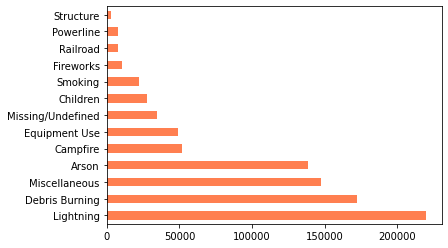

In [83]:
#causes of fire
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
plt.show()

In [84]:
le = preprocessing.LabelEncoder()
df_drop_date['STATE'] = le.fit_transform(df_drop_date['STATE'])
df_drop_date['DAY_OF_WEEK'] = le.fit_transform(df_drop_date['DAY_OF_WEEK'])
df_drop_date['TIME'] = le.fit_transform(df_drop_date['TIME'])
df_drop_date['FIRE_SIZE'] = le.fit_transform(df_drop_date['FIRE_SIZE'])
df_drop_date = df_drop_date.dropna()
print(df_drop_date.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DOY  \
0       2005    Miscellaneous  40.036944 -121.005833      4             33   
1       2004        Lightning  38.933056 -120.404444      4            133   
2       2004   Debris Burning  38.984167 -120.735556      4            152   
3       2004        Lightning  38.559167 -119.913333      4            180   
4       2004        Lightning  38.559167 -119.933056      4            180   

   FIRE_SIZE  MONTH  DAY_OF_WEEK  TIME  
0         33      2            6     0  
1         55      5            6     0  
2         33      5            1     0  
3         33      6            1     5  
4         33      6            1     5  


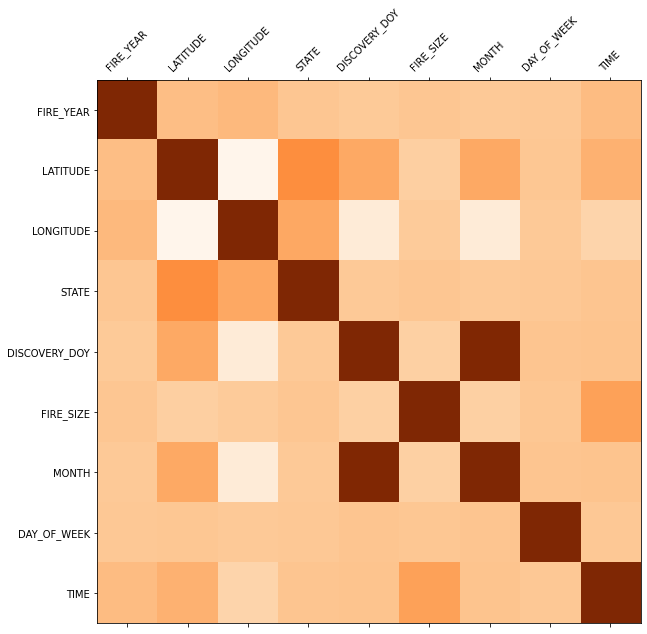

In [85]:
def plot_corr(df,size=10):
    corr = df_drop_date.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(df)

In [86]:
df_og = df_drop_date.copy()

In [87]:
df_drop_date.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DOY,FIRE_SIZE,MONTH,DAY_OF_WEEK,TIME
0,2005,Miscellaneous,40.036944,-121.005833,4,33,33,2,6,0
1,2004,Lightning,38.933056,-120.404444,4,133,55,5,6,0
2,2004,Debris Burning,38.984167,-120.735556,4,152,33,5,1,0
3,2004,Lightning,38.559167,-119.913333,4,180,33,6,1,5
4,2004,Lightning,38.559167,-119.933056,4,180,33,6,1,5


In [88]:
df_og.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DOY,FIRE_SIZE,MONTH,DAY_OF_WEEK,TIME
0,2005,Miscellaneous,40.036944,-121.005833,4,33,33,2,6,0
1,2004,Lightning,38.933056,-120.404444,4,133,55,5,6,0
2,2004,Debris Burning,38.984167,-120.735556,4,152,33,5,1,0
3,2004,Lightning,38.559167,-119.913333,4,180,33,6,1,5
4,2004,Lightning,38.559167,-119.933056,4,180,33,6,1,5


In [89]:
# df_drop_month = df_drop_date.drop('DISCOVERY_DOY',axis=1)
df_drop_month = df_drop_date.drop('MONTH',axis=1)

In [90]:
df_drop_month['STAT_CAUSE_DESCR'] = le.fit_transform(df_drop_month['STAT_CAUSE_DESCR'])

In [91]:
df_drop_month.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DOY,FIRE_SIZE,DAY_OF_WEEK,TIME
0,2005,7,40.036944,-121.005833,4,33,33,6,0
1,2004,6,38.933056,-120.404444,4,133,55,6,0
2,2004,3,38.984167,-120.735556,4,152,33,1,0
3,2004,6,38.559167,-119.913333,4,180,33,1,5
4,2004,6,38.559167,-119.933056,4,180,33,1,5


In [92]:
y_moth_fy = df_drop_month['STAT_CAUSE_DESCR'].values
X_month_fy = df_drop_month.drop(['STAT_CAUSE_DESCR'], axis=1).values

print(X_month_fy.shape)
print(y_moth_fy.shape)

(988934, 8)
(988934,)


In [100]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_month_fy,y_moth_fy,test_size=0.30, random_state=0)

In [101]:
model = tree.DecisionTreeClassifier(criterion = 'gini', 
                            max_depth = 200, 
                            min_samples_split = 100, 
                            min_samples_leaf = 10)
dt = model.fit(X_train_75, y_train_75)


In [102]:
# Print scores
print(f'Score on training set: {dt.score(X_train_75, y_train_75)}')
print(f'Score on testing set: {dt.score(X_test_25, y_test_25)}')

Score on training set: 0.6159768100310098
Score on testing set: 0.5770848669681354


In [103]:
df_label = df_drop_date.drop('MONTH',axis=1)


In [104]:
#Putting all the causes into 4 different categories, since there are so many of them. 
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    arson = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause

df_label['LABEL'] = df_label['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel
df_drop_month_4 = df_label.drop('STAT_CAUSE_DESCR',axis=1)
print(df_drop_month_4.head())
#The new categories are: "natural, accidental, arson and other"

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DOY  FIRE_SIZE  \
0       2005  40.036944 -121.005833      4             33         33   
1       2004  38.933056 -120.404444      4            133         55   
2       2004  38.984167 -120.735556      4            152         33   
3       2004  38.559167 -119.913333      4            180         33   
4       2004  38.559167 -119.933056      4            180         33   

   DAY_OF_WEEK  TIME  LABEL  
0            6     0      4  
1            6     0      1  
2            1     0      2  
3            1     5      1  
4            1     5      1  


In [105]:
#This time we want to predict 'Label'. Splitting the dataset into train and test sets once again.
y_label = df_drop_month_4['LABEL'].values
X_label = df_drop_month_4.drop(['LABEL'], axis=1).values

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_label,y_label,test_size=0.30, random_state=0)

In [106]:
model = tree.DecisionTreeClassifier(criterion = 'gini', 
                            max_depth = 200, 
                            min_samples_split = 100, 
                            min_samples_leaf = 10)
dt = model.fit(X_train_4, y_train_4)

In [108]:
# Print scores
print(f'Score on training set: {dt.score(X_train_4, y_train_4)}')
print(f'Score on testing set: {dt.score(X_test_4, y_test_4)}')

Score on training set: 0.7234984897140208
Score on testing set: 0.6856724899808212


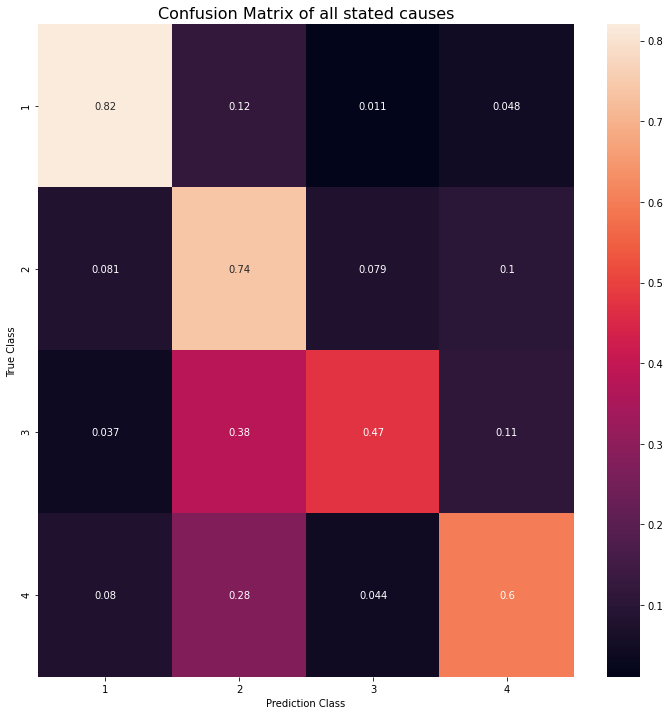

In [131]:
def plot_confusion_matrix(y_test, X_test, model):
    preds = model.predict(X_test)
    plt.figure(figsize = (12,12))
    plt.title('Confusion Matrix of all stated causes', fontdict = {'fontsize':16})

    sns.heatmap(confusion_matrix(y_test, 
                                 preds, 
                                 labels = [1,  2,  3, 4], 
                                 normalize = 'true'), annot = True)
    plt.xlabel('Prediction Class')
    plt.ylabel('True Class')
    plt.xticks(ticks = [i - 0.5 for i in range(1,5)], labels = [1,  2,  3, 4]);
    plt.yticks(ticks = [i - 0.5 for i in range(1,5)], labels = [1,  2,  3, 4]);

plot_confusion_matrix(y_test_4, X_test_4, dt)

In [121]:
rf = RandomForestClassifier(n_estimators = 50, 
                            max_depth = 100, 
                            min_samples_split = 100, 
                            min_samples_leaf =40)

rf_dt = rf.fit(X_train_4, y_train_4)

print(f'Score on training set: {rf_dt.score(X_train_4, y_train_4)}')
print(f'Score on testing set: {rf_dt.score(X_test_4, y_test_4)}')

Score on training set: 0.7041182920117356
Score on testing set: 0.6884498838820147


In [123]:
ada = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth = 2), n_estimators = 30)
ada_dt = ada.fit(X_train_4, y_train_4)
print(f'Score on training set: {ada_dt.score(X_train_4, y_train_4)}')
print(f'Score on testing set: {ada_dt.score(X_test_4, y_test_4)}')

Score on training set: 0.6040999461179656
Score on testing set: 0.6042618165639189


In [124]:
preds = ada.predict(X_test_4)


In [125]:
log_loss(y_test_4, preds)


ValueError: y_true and y_pred contain different number of classes 4, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [1 2 3 4]

In [ ]:
print(ada.score(X_train_4, y_train_4))
print(ada.score(X_test_4, y_test_4))